**[Do not edit the contents of this cell]**

# MSc in Bioinformatics and Theoretical Systems Biology - Maths and Stats Assignment 2019/20

This assignment is to be completed in Python, R or Julia and returned as a Jupyter notebook or rendered pdf. 
There are 4 types of cells used in this notebook:
1. Cells containing tasks and instructions to be completed. Do not edit these. These are clearly labelled.
2. Cells in which you are meant to provide an answer in Markdown format.
3. Cells containing code that defines e.g. which packages to load, but can also contain routines and snippets of codes that you should use.
4. Cells that contain the Python/R/Julia code that you write to solve the problems set.

Each of these cells will contain explit comments at the top telling you whether to edit or not edit a cell. In Code cells comments are specified by the "#" character. In the Markdown Answer Cells, replace the xxx by your answer, whenever these are present. You will have to execute all code and Markdown cells in order to (i) make use of the provided code, and (ii) format the markdown appropriately.

There are three problems to be solved:
1. Data exploration [40%]
2. Hypothesis testing [30%]
3. Classification [30%]

For each questions there several parts of different difficulty. Where appropriate, further reading will be given at the start of each question.

You will have to specify which language (and version) you used and all packages needed in order to run all Code cells. Please add this information in the next two cells. You can also use a mix of languages but any change has to be clearly indicated in the appropriate cell.

The kernel for this Jupyter notebook is R, version 3.6.1, with the following packages: corrplot, ggplot2

In [3]:
#here import all libraries or packages needed

library(ggplot2)
library(corrplot)

corrplot 0.84 loaded


**[Do not edit the contents of this cell]**

## Problem 1: data exploration

We consider a subset of data coming from a putative association study where researchers collected various metrics and phenotypes to find associations with a putative generic cardiovascular disease.
All recruited subjects are adults.
For each subject several predictor variables are recorded: sex, height (in cm), mass (in kg), whether is a smoker or not, her/his ethnicity, and levels of 5 different metabolites (labelled A-E).
Each subject has a unique ID number. 
For each subject a disease score, the response variable, measuring the severity of the disease phenotype in arbitrary units, is provided.
The data is provided in the file `association.csv`.

### Part 1

Load the dataset `association.csv`.
How many unique records of subjects do we have? How many unique predictor variables?

In [4]:
# [Write your code in this cell]

dataset <- read.csv("association.csv", header = TRUE)

#unique subjects = number of rows
nrow(dataset)

#unique predictor variables = number of columns - 2 (to account for ID column and disease_score column)
ncol(dataset)

[1] 106

[1] 12

**[Provide your answer here]**
- The number of unique records of subjects in the dataset is: 106
- The number of variables in the dataset is: 10

**[Do not edit the contents of this cell]**

### Part 2

Produce a plot to illustrate the distribution of variables sex, mass, ethnicity, metabolite_A. Choose the most appropriate visualisation depending on the type of each variable.

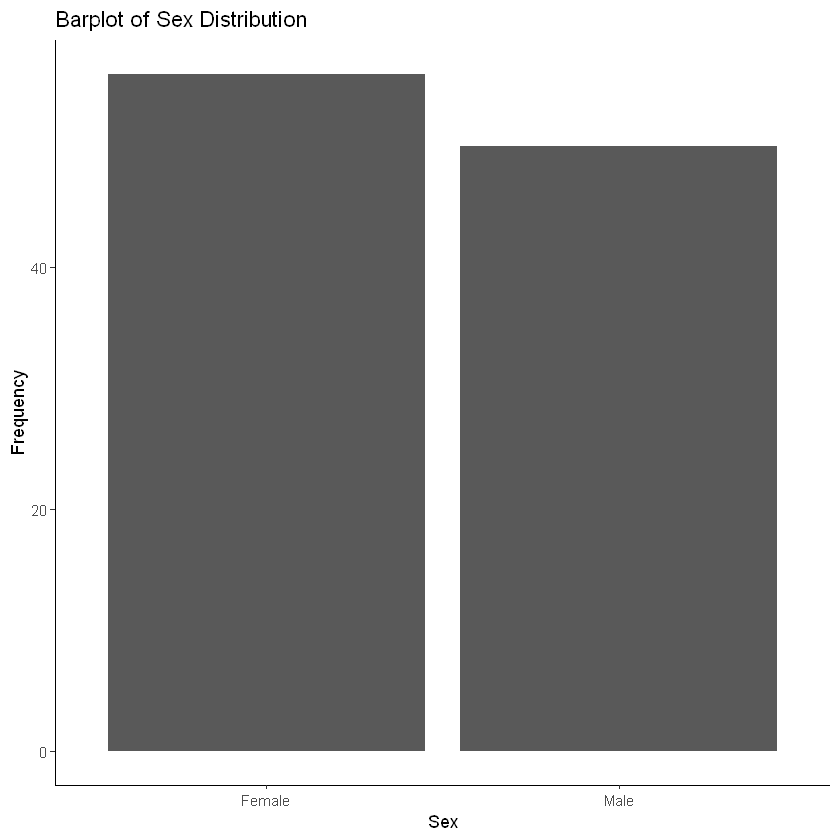

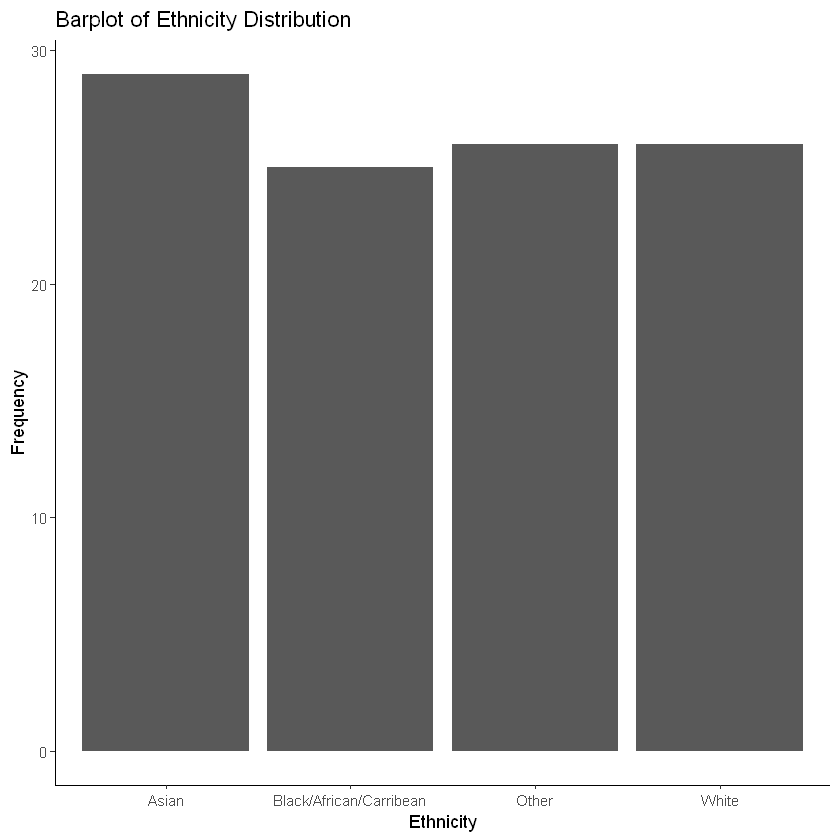

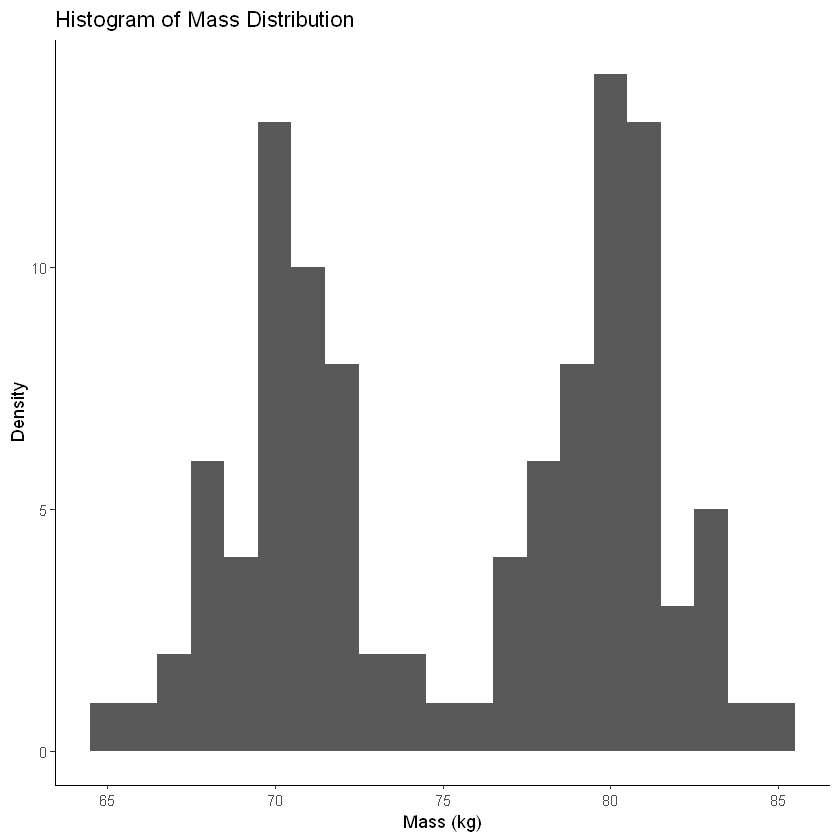

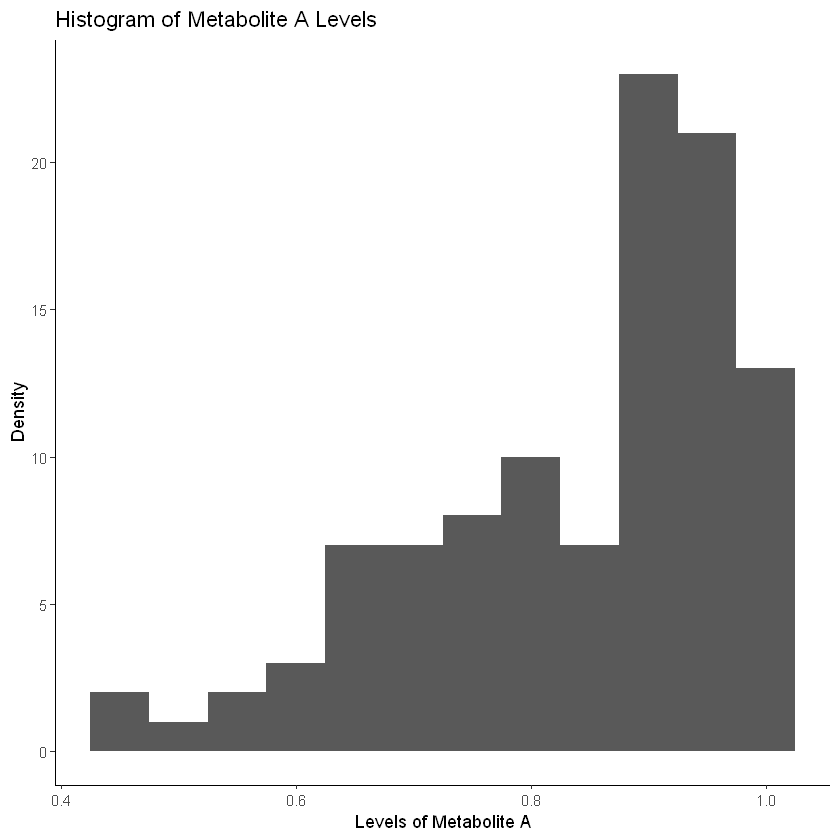

In [9]:
# [Write your code in this cell]

#Discrete - bar plots:

#sex
s<-data.frame(table(dataset[2]))
ggplot(data=s, aes(x=c("Female", "Male"), y=Freq)) + geom_bar(stat="identity") +
labs(title="Barplot of Sex Distribution",x="Sex", y = "Frequency") + theme_classic()

#ethnicity
e<-data.frame(table(dataset[6]))
ggplot(data=e, aes(x=c("Asian", "Black/African/Carribean", "Other", "White"), y=Freq)) + geom_bar(stat="identity") +
labs(title="Barplot of Ethnicity Distribution",x="Ethnicity", y="Frequency") + theme_classic()


#sex <- table(dataset[2])

#ethnicity <- table(dataset[6])


#Continuous - histograms:

#mass
ggplot(data.frame(dataset[4]), aes(x=mass)) + geom_histogram(binwidth=1) +
labs(title="Histogram of Mass Distribution",x="Mass (kg)", y = "Density") + theme_classic()

#metabolite A
#first remove NAs
metA <- unlist(dataset[7])
metA <- na.omit(metA) 

#then plot
ggplot(data.frame(metA), aes(x=metA)) + geom_histogram(binwidth=0.05) +
labs(title="Histogram of Metabolite A Levels",x="Levels of Metabolite A", y = "Density") + theme_classic()

**[Do not edit the contents of this cell]**

### Part 3

Write a function that returns the Body Mass Index (BMI).Calculate BMI for each subject and add it as new variable in the data set.

In [10]:
# [Write your code in this cell]

# Function to calculate BMI: weight (in kilograms) divided by height (in metres) squared
BMI_calc <- function(kg, cm) {
    BMI <- kg/((cm/100)^2)
    return(BMI)
}

mass <- unlist(dataset[4])
height <- unlist(dataset[3])
BMI_list <- c()

#loop to calculate each individual's BMI and add to a list
for (i in (1:nrow(dataset))) {
    bmi<- BMI_calc(mass[[i]], height[[i]])
    BMI_list <- append(BMI_list, bmi)
}

#add list of BMIs as a column to the dataset
dataset$BMI <- BMI_list

**[Do not edit the contents of this cell]**

### Part 4

Calculate the correlation matrix between numerical predictors. Use this information to impute any missing values, if possible.

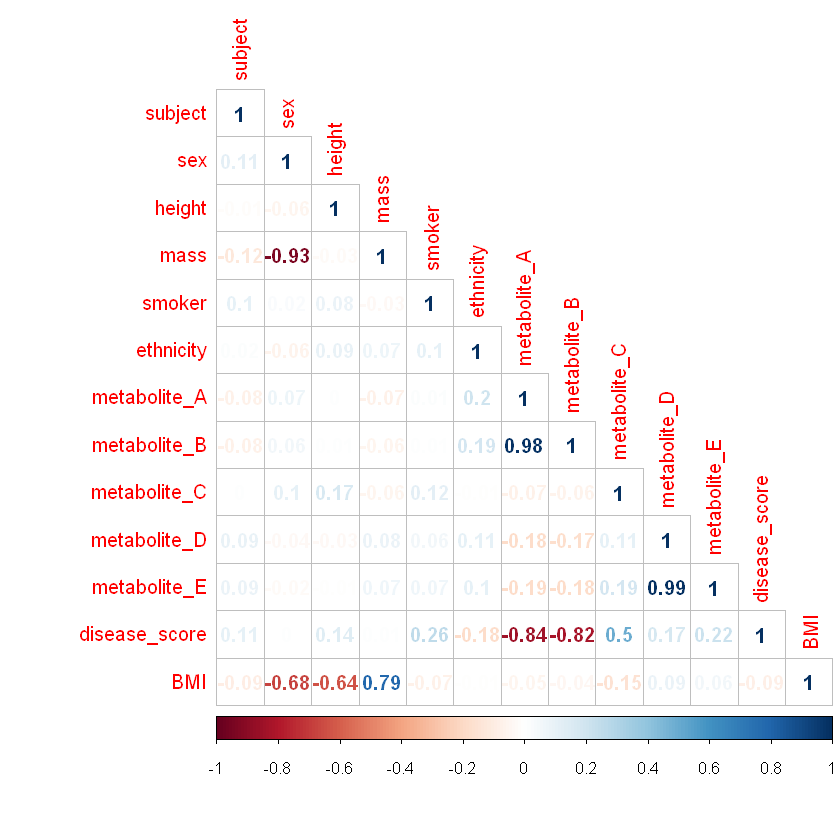

In [11]:

# [Write your code in this cell]

#dset<-data.matrix(dataset)
#install.packages("corrplot")
#use="complete.obs" deletes subjects with missing data
cor_data = cor(data.matrix(dataset), use="complete.obs")
corrplot(cor_data, method="number", type="lower")


#The correlation matrix shows metabolite_A has a strong positive correlation with metabolite_B. 
#This can be used to predict the missing values for metabolite_A using a linear model.

model<-lm(metabolite_A ~ metabolite_B, data=dataset)

input_metB <-data.frame(metabolite_B = c(dataset$metabolite_B[is.na(dataset$metabolite_A)]))
output_metA <- predict(model, input_metB)

dataset$metabolite_A[is.na(dataset$metabolite_A)] <- output_metA


**[Do not edit the contents of this cell]**

### Part 5

Assuming that a disease status is recorded when the disease score is greater than 5, add a new response variable in the dataset defining the diseases status of each subject.

In [12]:
# [Write your code in this cell]

disease_status <- c()

for (i in (1:nrow(dataset))) {
    if (dataset$disease_score[[i]] <= 5) {
        disease_status <- append(disease_status, 0)
    } else if (dataset$disease_score[[i]] > 5) {
        disease_status <- append(disease_status, 1)
    }
}

#append column to dataset
dataset$disease_status <- disease_status

**[Do not edit the contents of this cell]**

## Problem 2: hypothesis testing

Starting from the same dataset in Problem 1, provide answers for the following questions.

### Part 1

Given this sample space of subjects, what is the probability that a given subject is diagnosed as diseased? What is the probability that a subject is diagnosed as diseased given that he/she is not a smoker?

In [13]:
# [Write your code in this cell]

#Probability that a subject is diagnosed as diseased = 'number of diseased subjects'/'total number of subjects'
num_diseased <- length(disease_status[disease_status==1])
p_disease <- num_diseased/nrow(dataset)
p_disease



#Probability that a suject is diseased, given that he/she is not a smoker
#Create new sample space including only smokers
non_smokers <- subset(dataset, smoker==0, c(1:14))

#Calculate probability of disease in new sample space
num_diseased_nonS <- length(non_smokers$disease_status[non_smokers$disease_status==1])
p_diseased_nonS <- num_diseased_nonS/nrow(non_smokers)
p_diseased_nonS

[1] 0.1320755

[1] 0.08641975

**[Provide your answer here]**
- The probability that a subject is diseased is: 0.1321
- The probability that a subject is diseased given that she/he is not a smoker is: 0.0864

**[Do not edit the contents of this cell]**

### Part 2

Assuming that they are Normally distributed, estimate mean and variance for the distributions of height and mass separately for males and females. Use **either** a frequentist **or** likelihoodist **or** Bayesian approach.

In [14]:
# [Write your code in this cell]

#assume 0=male and 1=female, based on negative correlation with mass.
M_data <- subset(dataset, sex==0, c(1:14))
F_data <- subset(dataset, sex==1, c(1:14))



#Male height
mhm <- round(mean(M_data$height), digits=2)
mhv <-round(var(M_data$height), digits=2)

#Female height
fhm <- round(mean(F_data$height), digits=2)
fhv <-round(var(F_data$height), digits=2)

#Male mass
mmm <- round(mean(M_data$mass), digits=2)
mmv <- round(var(M_data$mass), digits=2)

#Female mass
fmm <- round(mean(F_data$mass), digits=2)
fmv <- round(var(F_data$mass), digits=2)



#summarise
x <- data.frame("Parameters" = c("Mean", "Variance"),
                "M_height" = c(mhm, mhv),
                "F_height" = c(fhm, fhv),
                "M_mass" = c(mmm, mmv),
                "F_mass" = c(fmm, fmv) )

x

Parameters,M_height,F_height,M_mass,F_mass
<fct>,<dbl>,<dbl>,<dbl>,<dbl>
Mean,178.76,178.18,80.11,70.33
Variance,26.55,21.17,3.43,4.05


**[Do not edit the contents of this cell]**

### Part 3

Test whether height is different between males and females. Perform the same test on the mass variable. Define (in words) which ones are your null and alternative hypotheses and significance threshold. Finally, discuss (in words) any conclusion you can make out the results of your statistical tests.

In [18]:
# [Write your code in this cell]

#t-tests using default parameters.
t.test(M_data$height, F_data$height)
t.test(M_data$mass, F_data$mass)



	Welch Two Sample t-test

data:  M_data$height and F_data$height
t = 0.60633, df = 104, p-value = 0.5456
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -1.304299  2.453177
sample estimates:
mean of x mean of y 
 178.7563  178.1819 



	Welch Two Sample t-test

data:  M_data$mass and F_data$mass
t = 25.94, df = 100.09, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
  9.035798 10.532413
sample estimates:
mean of x mean of y 
 80.11436  70.33025 


**[Provide your answer here]**  
  
**t-tests**  
To test whether height and weight are different between males and females, a t-test was used. This is appropriate to test if two, Normally distributed, sets of data are significanly different from each other.

The default conditions for the t-test were used. For example, it was treated as a two-sided, independent t-test, with confidence level 0.95.

**Test 1: Height**  
Null hypothesis: height is not significantly different between males and females.  
Alternative hypothesis: height is significantly different between males and females.

The p-value was calculated as 0.5456, this is above the significance value (0.05). This is insufficient to reject the null hypothesis, that there is no significant difference between male and female heights.  
  
We cannot *accept* the null hypothesis, only *fail to reject it*. So it is still possible that there may be a difference in heights. 


**Test 2: Weight**  
Null hypothesis: mass is not significantly differene between males and females.  
Alternative hypothesis: mass is significantly differene between males and females.  

The p-valule was calculated as <2.2e-16. This is below the significance value (0.05) and therefore sufficient to reject the null hythpothesis. 

We can conclude that the mass between males and females is significantly different (p-value <2.2e-15).

**[Do not edit the contents of this cell]**

### Part 4

Repeat the statistical test in Part 3 for all numerical predictor variables in the dataset. How many tests are significant with $\alpha=0.05$?
Calculate corrected p-values for multiple tests using a Bonferroni correction. How many tests are significant now? 

In [19]:
# [Write your code in this cell]

#t-tests for all numerical predictor variables
p_MetA<- t.test(M_data$metabolite_A, F_data$metabolite_A)$p.value
p_MetB<- t.test(M_data$metabolite_B, F_data$metabolite_B)$p.value
p_MetC<- t.test(M_data$metabolite_C, F_data$metabolite_C)$p.value
p_MetD<- t.test(M_data$metabolite_D, F_data$metabolite_D)$p.value
p_MetE<- t.test(M_data$metabolite_E, F_data$metabolite_E)$p.value
p_BMI<- t.test(M_data$BMI, F_data$BMI)$p.value

pvals <- data.frame("numerical_predictor" = c("metabolite_A" ,
                                              "metabolite_B" ,
                                              "metabolite_C" , 
                                              "metabolite_D" , 
                                              "metabolite_E" , 
                                              "BMI"), 
                    "p_value" = c(p_MetA, 
                                  p_MetB, 
                                  p_MetC, 
                                  p_MetD, 
                                  p_MetE, 
                                  p_BMI)
                   )
pvals


#Bonferroni-corrected significance level= alpha/number of variables tested
Bp_val = 0.05/6
Bp_val/2

numerical_predictor,p_value
<fct>,<dbl>
metabolite_A,5.319008e-01
metabolite_B,6.268551e-01
metabolite_C,3.363449e-01
metabolite_D,6.627932e-01
metabolite_E,7.748395e-01
BMI,6.931685e-16


[1] 0.004166667

**Part 4 Answer**  
T-tests were carried out on the remaining numerical predictors as there were in part 3.  

Null Hypotheses: There is no significant difference in the stated numerical predictor between males and females.  
Alternative Hypothesis: There is a significant difference in the stated numerical predictor between males and females.  

The results are summarised as follows:  

Metabolite A: fail to reject null hypothesis  
Metabolite B: fail to reject null hypothesis  
Metabolite C: fail to reject null hypothesis  
Metabolite D: fail to reject null hypothesis  
Metabolite E: fail to reject null hypothesis   
BMI: reject null hypothesis as pval<0.025  

**Bonferroni Correction**  
The Bonferroni correction accounts for the number of variables tested, in this case 6.  
Bonferroni-corrected significance levels were calculated as 0.00417 and 1 - 0.00417 (for each tail).  
This made no difference to any result.

**[Do not edit the contents of this cell]**

## Problem 3: classification

### Part 1

Implement an algorithm to predict the disease status of a subject given all response variables provided in the dataset. You are free to choose the appropriate statistical tool you prefer. Assess the quality of your classifier.

In [20]:
#The following script generates a model to calculate disease scores
#and then converts the disease scores into disease status'

#The multiple regression model is generated as follows:

#Clean up data
dataset$sex<-as.factor(dataset$sex)
dataset$smoker<-as.factor(dataset$smoker)
dataset$disease_status<-as.factor(dataset$disease_status)

#Divide data into training and test sets (4:1 split)
training_set <- dataset[1:85,]
test_set <- dataset[86:106,]

#Model
model<-lm(disease_score ~ 
           sex +
           height +
           mass +           
           smoker + 
           ethnicity + 
           metabolite_A + 
           metabolite_B + 
           metabolite_C + 
           metabolite_D + 
           metabolite_E, data=training_set)

summary(model)

#The R-squared statistic was high and the p-value for the model was significant (below 0.05). Suggesting this is a good model.

#The P-values for each individual predictor variable shows that most of these predictors are not contributing much to the model. 
#If the significance level is 0.05 as standard, only those with '***' are making a significant contribution to the model.





#To test the accuracy of the model, a subset of the training data was excluded from training for use in testing. 
p_disease_score <- predict(model, test_set)

#The predicted disease scores were converted into predicted disease status
p_disease_status <- c()

for (i in (1:length(p_disease_score))) {
    
    if (p_disease_score[i] <= 5) {
        p_disease_status <- append(p_disease_status, 0)
    } else if (p_disease_score[i] > 5) {
        p_disease_status <- append(p_disease_status, 1)
    }   
}

#The predictions were directly compared
test_set$disease_status == p_disease_status

# In this small test, the predictions were 100% successful. It may be more beneficial to 
# analyse the ability of the test to predict the numerical dependent variable, disease_score.
# This was done by calculating the RMSE between the predicted and true disease_scores in the test set.
error <- test_set$disease_score - p_disease_score
rmse <- sqrt(mean(error^2))
rmse






Call:
lm(formula = disease_score ~ sex + height + mass + smoker + ethnicity + 
    metabolite_A + metabolite_B + metabolite_C + metabolite_D + 
    metabolite_E, data = training_set)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.5499 -0.7542  0.0824  0.8954  2.3465 

Coefficients:
                                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)                       18.03194    9.15273   1.970   0.0527 .  
sex1                              -0.62650    0.81508  -0.769   0.4446    
height                             0.05341    0.02860   1.868   0.0659 .  
mass                              -0.08189    0.08135  -1.007   0.3174    
smoker1                            2.51450    0.34057   7.383 2.16e-10 ***
ethnicityBlack/African/Caribbean  -0.17031    0.38681  -0.440   0.6610    
ethnicityOther                    -0.30610    0.40348  -0.759   0.4505    
ethnicityWhite                    -0.49003    0.40680  -1.205   0.2323    
metabolite_A                    

[1] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
[16] TRUE TRUE TRUE TRUE TRUE TRUE

[1] 0.7771112

**[Do not edit the contents of this cell]**

### Part 2

Given the classifier you devised in Part 1, predict the disease status of the following subject:
- subject: ID986
- sex: 1
- height: 180.2
- mass: 70.1
- smoker: 1
- ethnicity: "White"
- metabolite_A: 0.5
- metabolite_B: 1.2
- metabolite_C: 0.5
- metabolite_D: 8.5
- metabolite_E: 10.2

In [21]:
# [Write your code in this cell]

test_subject <- data.frame("subject"= c("ID986"), "sex" = "1", "height" = 180.2, "mass" = 70.1,
                           "smoker" = "1", "ethnicity" = "White", "metabolite_A" = 0.5, "metabolite_B" = 1.2, 
                           "metabolite_C" = 0.5, "metabolite_D" = 8.5, "metabolite_E" = 10.2
)


p_score <- predict(model, test_subject)


    if (p_score <= 5) {
        p_status <- 0
    } else if (p_score > 5) {
        p_status <- 1
    }

p_status

#subject ID986 is diseased

[1] 1